In [2]:
import pandas as pd
pd.set_option('max_columns', None)
import numpy as np

In [3]:
stocks = pd.read_csv("./datasets/prices.csv", parse_dates=['date'])
stocks = stocks[stocks['symbol'] == "GOOG"].set_index('date')
stocks.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOG,626.951088,626.751061,624.241073,629.511067,3927000.0
2010-01-05,GOOG,627.181073,623.991055,621.541045,627.841071,6031900.0
2010-01-06,GOOG,625.861078,608.261023,606.361042,625.861078,7987100.0
2010-01-07,GOOG,609.401025,594.101005,592.651008,610.001045,12876600.0
2010-01-08,GOOG,592.000997,602.021036,589.110988,603.251034,9483900.0


In [4]:
shelter_outcomes = pd.read_csv(
    "./datasets/aac_shelter_outcomes.csv", 
    parse_dates=['date_of_birth', 'datetime']
)
shelter_outcomes = shelter_outcomes[
    ['outcome_type', 'age_upon_outcome', 'datetime', 'animal_type', 'breed', 
     'color', 'sex_upon_outcome', 'date_of_birth']
]
shelter_outcomes.head()

,outcome_type,age_upon_outcome,datetime,animal_type,breed,color,sex_upon_outcome,date_of_birth
0,Transfer,2 weeks,2014-07-22 16:04:00,Cat,Domestic Shorthair Mix,Orange Tabby,Intact Male,2014-07-07
1,Transfer,1 year,2013-11-07 11:47:00,Dog,Beagle Mix,White/Brown,Spayed Female,2012-11-06
2,Adoption,1 year,2014-06-03 14:20:00,Dog,Pit Bull,Blue/White,Neutered Male,2013-03-31
3,Transfer,9 years,2014-06-15 15:50:00,Dog,Miniature Schnauzer Mix,White,Neutered Male,2005-06-02
4,Euthanasia,5 months,2014-07-07 14:04:00,Other,Bat Mix,Brown,Unknown,2014-01-07


In [5]:
plt = shelter_outcomes['date_of_birth'].value_counts().sort_values().plot

<AxesSubplot:>

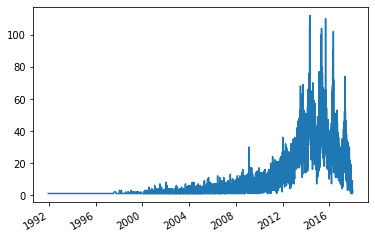

In [6]:
plt.line()

<AxesSubplot:>

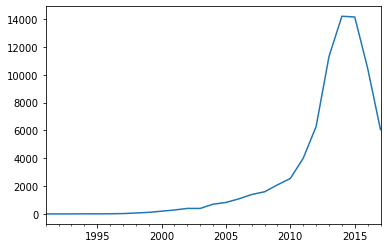

In [17]:
resampled = shelter_outcomes['date_of_birth'].value_counts().resample('y')
resampled.sum().plot.line()

<AxesSubplot:xlabel='date'>

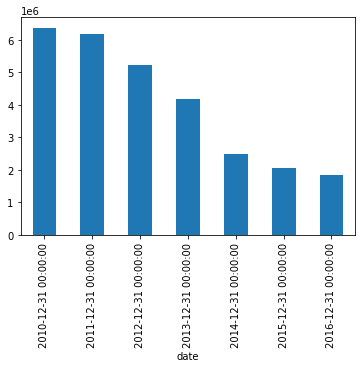

In [9]:
stocks['volume'].resample('Y').mean().plot.bar()

In [18]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

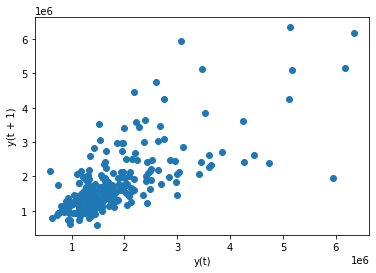

In [19]:
lag_plot(stocks['volume'].tail(250))

In [20]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

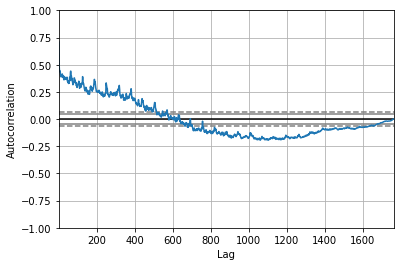

In [21]:
autocorrelation_plot(stocks['volume'])

In [22]:
import pandas as pd

crypto = pd.read_csv("./datasets/crypto-markets.csv")
crypto = crypto[crypto['name'] == 'Bitcoin']
crypto['date'] = pd.to_datetime(crypto['date'])
crypto.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


In [23]:
shelter_outcomes['datetime'].resample('Y').sum().plot.line()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'